### KMeans

- solves one of the biggest draw-backs of hierarchical clustering, runtime
- runs significantly faster on large datasets
- finds clusters of samples
- number of clusters must be specified
- implemented in scikit-learn library

In [ ]:
#Step 1 - Generate Cluster Centers (kmeans function)
#takes the following arguments

kmeans(obs,           #list of observations standardized through "whiten" method
       k_or_guess,    #number of clusters
       iter,          #number of iterations(default:20)
       thresh,  
       #algorithm is terminated IF the change in "distortion" since the last k-means iteration
       #is less than or equal to the threshold (0.00001)
       check_finite)  
        #whether a check needs to be performed on the data 
        #if observations contain only finite numbers (default:True)

#the result returns:
# 1 - cluster centers
# 2 - a single distortion

In [ ]:
#Step 2 - Generate Cluster Labels (vq function)
#takes the following arguments

vq(obs,             #standardized observations using "whiten" method
  code_book,        #cluster centers
  check_finite=True)
  #same as above
    
#the function returns:
# 1 - a list of cluter labels
# 2 - a list of distortions

#Checkpoint: the mean of the LIST of distortions here should appx equal the distortion value of kmeans
#if the same list of observations is passed through both

In [ ]:
#Running KMeans in Python

#import libraries
from scipy.cluster.vq import kmeans, vq

#generate clusters and labels
cluster_centers, _ = kmeans(df[['scaled_x', 'scaled_y']], 3)

df['cluster_labels'], _ = vq(df[['scaled_x', 'scaled_y']], cluster_centers)

#display scatter plot with seaborn
sns.scatterplot(x='scaled_x', y='scaled_y', hue='cluster_labels', data=df)
plot.show()

##### running the modeling

In [ ]:
#import library package
from sklearn.cluster import KMeans

#define a KMeans model defined with number of clusters desired to accomplish
model = KMeans(n_clusters=3)

#call the fit array by passing the number of samples/df
model.fit(samples)

#call the predict method on the samples
labels = model.predict(samples)
#returning a cluster label determining what cluster the samples belong to

#### K Means and Centroids

- New samples can be assigned to existing clusters because kmeans actually remembers the mean ("Centroid") of each cluster.  **New samples are assigned to the cluster whose centroid is closest.**

In [ ]:
#to apply the new samples to the clusters
#re apply the predict method to the new samples
new_labels = model.predict(new_samples)

#### Visualizing Clusters

In [ ]:
import matplotlib.pyplot as plt
xs = samples[:, 0] #all rows for column with index 0 (column1)
ys = samples[:, 2] #all rows for column with index 2 (column3)

plt.scatter(xs, ys, 
            c=labels)  #to color by cluster labels
plot.show()

In [ ]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

#### Evaluating Clustering

##### aligining labels and types of categories we want to look into

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'labels' : lables
    'categories' : categories
})

##### Crosstab of labels and categories

In [ ]:
ct = pd.crosstab(df['labels'], df['categories'])

- This ideally should give an idea of how the labels to categories correspondence looks like and if it is reasonably clustered

Example grid 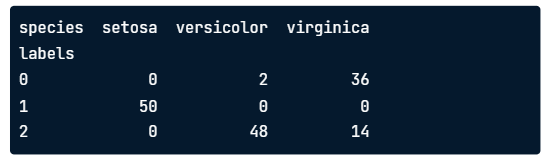

- However, sometimes categories like this may not be available to test the quality of the clusters

In which case we need to use the samples and their cluster labels to determine the quality.

#### How to find the right number of Clusters - the Elbow Method

The Elbow plot can be seen below:
- graphs the number of clusters versus distortion
- ONLY gives an INDICATION of optimal_k_(number of clusters)
- it sometimes fails when the data is evenly distributed
    - other methods may be used in this case: average silhouette or gap statistic

In [ ]:
#declaring variables
distortions = []
num_clusters = range(2,7)

#populating distortions from various clusters
for i in num_clusters:
    centroids, distortion = kmeans(df[['scaled_x', 'scaled_y']], i)
    distortions.append(distortion)
    
#plotting the elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                               'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions',
            data=elbow_plot_data)
plt.show()

#### A good cluster is a Tight Cluster

How spread out the clusters are can be meansured by the **Inertia**.
- Inertia measures how far the sample is from the centroid
- the lower the better, small distances
- K-means attempts to minimize the inertia when choosing clusters

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

#### The Trade-off

- a good cluster with low inertia (ie. tight) will have few clusters
- the best number of clusters ideal would be one in the "elbow" of the inertial graph
- this is where the inertia begins to decrease more slowly

for example here in this graph, this would be the point with 3 clusters 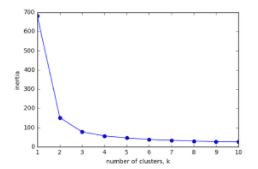

In [ ]:
#using a loop
ks = range(1, 6)
inertias = []

#for each avlue of k cluster, perform the following steps:
for k in ks:
    # a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # fit model to samples
    model.fit(samples)
    
    # append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
#a couple of other things that can be done

#creating a DataFrame with clusters and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

#### Feature Variance

- The variance of a feature measures the spread of its values.
- **the feature variance** corresponds to its feature influence of the clustering algorithm

##### How can feature variance be handled?

- to give every feature an "equal" chance, the data needs to be transformed so that features have equal variaane.

#### StandardScaler

- an example of a Pre-Processing step
- transforms every feature to have mean 0 and variance 1
- these resulting "standardized" features can be very useful

#### Other Pre-Processing steps available

- MaxAbsScaler
- Normalizer

In [ ]:
from sklearn.preprocessing import StandardScaler

#createa a StandardScaler object and fit it to the samples
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)

#the transform method now can be used to standardize any samples
samples_scaled = scaler.transform(samples)

#### Sklearn pipeline

- data flows from one step into the next automatically by fitting multiple stes into it

In [ ]:
#the first steps: creating a StandardScaler() and KMeans() object
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

#we could have just as well used "Normalizer()"
#from sklearn.preprocessing import Normalizer
#normalizer = Normalizer()

#import the make_pipeline from sklearn
from sklearn.pipeline import make_pipeline

#apply the make_pipeline to the steps you want to create
#in this scenario simply just the scaler and kmeans objects
pipeline = make_pipeline(scaler, kmeans)

#pipeline = make_pipeline(normalizer, kmeans)

#use the fit method of the pipeline to fit both scaler and kmeans
pipeline.fit(samples)

#use the predict method to obtain the cluster labels
labels = pipeline.predict(samples)